In [40]:
import numpy as np
import matplotlib.pyplot as plt

class Molecule:
    def __init__(self, concentration=0, diffusion_rate=1):
        self.concentration = concentration
        self.diffusion_rate = diffusion_rate

    def __repr__(self):
        return f"Molecule(concentration={self.concentration}, diffusion_rate={self.diffusion_rate})"

class ReactionDiffusionSystem:
    def __init__(self, width, height, molecule_a, molecule_b, feed_rate, kill_rate, diffusion_rate_a, diffusion_rate_b):
        self.width = width
        self.height = height
        self.molecule_a = molecule_a
        self.molecule_b = molecule_b
        self.feed_rate = feed_rate
        self.kill_rate = kill_rate
        self.diffusion_rate_a = diffusion_rate_a
        self.diffusion_rate_b = diffusion_rate_b
        self.grid_a = np.zeros((height, width))
        self.grid_b = np.zeros((height, width))

    def initialize(self, gradient_a_func):
        for y in range(self.height):
            for x in range(self.width):
                self.grid_a[y, x] = gradient_a_func(x, self.width)

    def update(self):
        next_grid_a = np.zeros((self.height, self.width))
        next_grid_b = np.zeros((self.height, self.width))

        for y in range(self.height):
            for x in range(self.width):
                a = self.grid_a[y, x]
                b = self.grid_b[y, x]

                a_normalized = max(0, min(a, 1))
                b_normalized = max(0, min(b, 1))

                da = self.diffusion_rate_a * self.laplacian(self.grid_a, x, y) - a_normalized * b_normalized * b_normalized + self.feed_rate * (1 - a_normalized)
                db = self.diffusion_rate_b * self.laplacian(self.grid_b, x, y) + a_normalized * b_normalized * b_normalized - (self.kill_rate + self.feed_rate) * b_normalized

                next_grid_a[y, x] = a + da
                next_grid_b[y, x] = b + db

        self.grid_a = next_grid_a
        self.grid_b = next_grid_b


    def laplacian(self, grid, x, y):
        total = 0
        total += grid[(y - 1) % self.height, x]     # top
        total += grid[y, (x - 1) % self.width]     # left
        total += grid[(y + 1) % self.height, x]     # bottom
        total += grid[y, (x + 1) % self.width]     # right
        total -= 4 * grid[y, x]   # center
        return total

    def plot(self):
        plt.imshow(self.grid_a, cmap='Reds', alpha=0.1, interpolation='nearest')
        plt.colorbar()
        plt.show()

def gradient_func_a(x, width):
    return x

def gradient_func_b(x, width):
    return x / (width - 1)

molecule_a = Molecule(concentration=1)

system = ReactionDiffusionSystem(width=50, height=50, molecule_a=molecule_a,
                                 feed_rate=0.055, kill_rate=0.062, diffusion_rate_a=1.0, diffusion_rate_b=1)
system.initialize(gradient_func_a)

for i in range(10):
    system.update()

system.plot()

TypeError: ReactionDiffusionSystem.__init__() missing 1 required positional argument: 'molecule_b'

## Single molecule

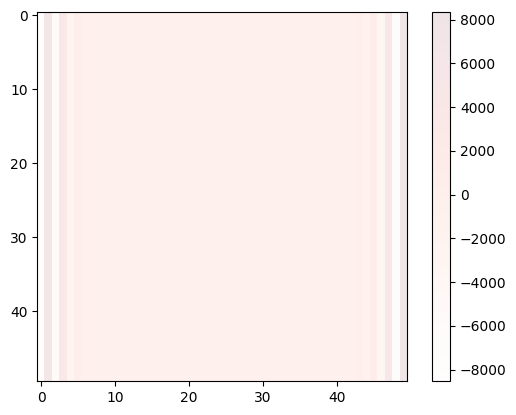

In [49]:
import numpy as np
import matplotlib.pyplot as plt

class Molecule:
    def __init__(self, concentration=0, diffusion_rate=1):
        self.concentration = concentration
        self.diffusion_rate = diffusion_rate

    def __repr__(self):
        return f"Molecule(concentration={self.concentration}, diffusion_rate={self.diffusion_rate})"

class ReactionDiffusionSystem:
    def __init__(self, width, height, molecule_a, feed_rate, kill_rate, diffusion_rate_a):
        self.width = width
        self.height = height
        self.molecule_a = molecule_a
        self.feed_rate = feed_rate
        self.kill_rate = kill_rate
        self.diffusion_rate_a = diffusion_rate_a
        self.grid_a = np.zeros((height, width))

    def initialize(self, gradient_a_func):
        for y in range(self.height):
            for x in range(self.width):
                self.grid_a[y, x] = gradient_a_func(x, self.width)

    def update(self):
        next_grid_a = np.zeros((self.height, self.width))

        for y in range(self.height):
            for x in range(self.width):
                a = self.grid_a[y, x]

                a_normalized = max(0, min(a, 1))

                da = self.diffusion_rate_a * self.laplacian(self.grid_a, x, y) - a_normalized * a_normalized * a_normalized + self.feed_rate * (1 - a_normalized)

                next_grid_a[y, x] = a + da

        self.grid_a = next_grid_a

    def laplacian(self, grid, x, y):
        total = 0
        total += grid[(y - 1) % self.height, x]     # top
        total += grid[y, (x - 1) % self.width]     # left
        total += grid[(y + 1) % self.height, x]     # bottom
        total += grid[y, (x + 1) % self.width]     # right
        total -= 4 * grid[y, x]   # center
        return total

    def plot(self):
        plt.imshow(self.grid_a, cmap='Reds', alpha=0.1, interpolation='nearest')
        plt.colorbar()
        plt.show()

def gradient_func_a(x, width):
    return x / width

molecule_a = Molecule(concentration=1)

system = ReactionDiffusionSystem(width=50, height=50, molecule_a=molecule_a,
                                 feed_rate=0.055, kill_rate=0.062, diffusion_rate_a=1.0)
system.initialize(gradient_func_a)

for i in range(10):
    system.update()

system.plot()


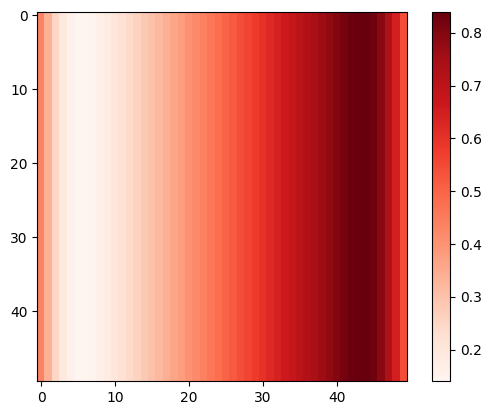

In [70]:
import numpy as np
import matplotlib.pyplot as plt

class Molecule:
    def __init__(self, concentration=0, diffusion_rate=1):
        self.concentration = concentration
        self.diffusion_rate = diffusion_rate

    def __repr__(self):
        return f"Molecule(concentration={self.concentration}, diffusion_rate={self.diffusion_rate})"

class ReactionDiffusionSystem:
    def __init__(self, width, height, molecule_a, diffusion_rate_a):
        self.width = width
        self.height = height
        self.molecule_a = molecule_a
        self.diffusion_rate_a = diffusion_rate_a
        self.grid_a = np.zeros((height, width))

    def initialize(self, gradient_a_func):
        for y in range(self.height):
            for x in range(self.width):
                self.grid_a[y, x] = gradient_a_func(x, self.width)

    def update(self):
        next_grid_a = np.zeros((self.height, self.width))

        for y in range(self.height):
            for x in range(self.width):
                a = self.grid_a[y, x]
                da = self.diffusion_rate_a * self.laplacian(self.grid_a, x, y)
                next_grid_a[y, x] = a + da

        self.grid_a = next_grid_a

    def laplacian(self, grid, x, y):
        total = 0
        total += grid[(y - 1) % self.height, x]     # top
        total += grid[y, (x - 1) % self.width]     # left
        total += grid[(y + 1) % self.height, x]     # bottom
        total += grid[y, (x + 1) % self.width]     # right
        total -= 4 * grid[y, x]   # center
        return total

    def plot(self):
        plt.imshow(self.grid_a, cmap='Reds', alpha=1, interpolation='nearest')
        plt.colorbar()
        plt.show()

def gradient_func_a(x, width):
    return x / width

molecule_a = Molecule(concentration=1)

system = ReactionDiffusionSystem(width=50, height=50, molecule_a=molecule_a, diffusion_rate_a=0.001)
system.initialize(gradient_func_a)

for i in range(5000):
    system.update()

system.plot()


Maximum iterations reached without convergence.


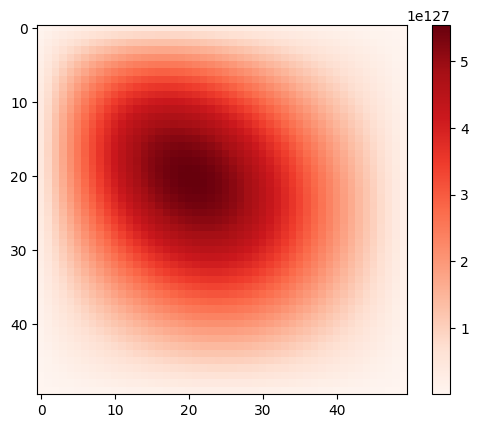

In [73]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

class Molecule:
    def __init__(self, concentration=0, diffusion_rate=1):
        self.concentration = concentration
        self.diffusion_rate = diffusion_rate

    def __repr__(self):
        return f"Molecule(concentration={self.concentration}, diffusion_rate={self.diffusion_rate})"

class ReactionDiffusionSystem:
    def __init__(self, width, height, molecule_a, diffusion_rate_a):
        self.width = width
        self.height = height
        self.molecule_a = molecule_a
        self.diffusion_rate_a = diffusion_rate_a
        self.grid_a = np.zeros((height, width))

    def initialize(self):
        # Initialize the center pixel with a concentration of 1
        center_x = self.width // 2
        center_y = self.height // 2
        self.grid_a[center_y, center_x] = molecule_a.concentration
        self.grid_a[10, 10] = molecule_a.concentration

    def update(self):
        # Define the diffusion kernel
        diffusion_kernel = np.array([[1, 1, 1],
                                     [1, 0.25, 1],
                                     [1, 1, 1]])

        # Perform diffusion using convolution
        da = self.diffusion_rate_a * convolve(self.grid_a, diffusion_kernel, mode='constant')

        # Update the concentration grid
        self.grid_a += da

    def plot(self):
        plt.imshow(self.grid_a, cmap='Reds', alpha=1, interpolation='nearest')
        plt.colorbar()
        plt.show()

    def is_converged(self, threshold=0.001):
        """Check if the concentration grid has converged."""
        change = np.max(np.abs(self.grid_a - np.mean(self.grid_a)))
        return change < threshold

molecule_a = Molecule(concentration=1)

system = ReactionDiffusionSystem(width=50, height=50, molecule_a=molecule_a, diffusion_rate_a=0.1)
system.initialize()

iterations = 0
max_iterations = 500  # Set your maximum iteration limit here

while not system.is_converged() and iterations < max_iterations:
    system.update()
    iterations += 1

if iterations == max_iterations:
    print("Maximum iterations reached without convergence.")
else:
    print(f"Converged after {iterations} iterations.")
system.plot()

Maximum iterations reached without convergence.


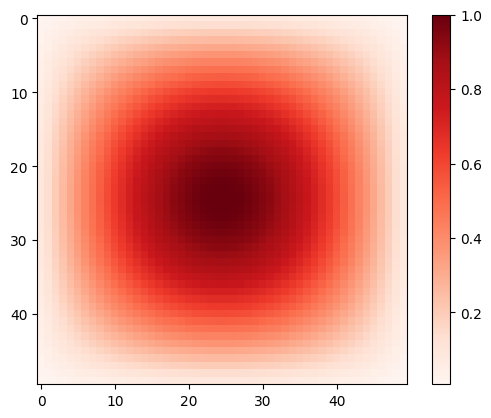

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

class Molecule:
    def __init__(self, concentration=0, diffusion_rate=1):
        self.concentration = concentration
        self.diffusion_rate = diffusion_rate

    def __repr__(self):
        return f"Molecule(concentration={self.concentration}, diffusion_rate={self.diffusion_rate})"

class ReactionDiffusionSystem:
    def __init__(self, width, height, molecule_a, diffusion_rate_a):
        self.width = width
        self.height = height
        self.molecule_a = molecule_a
        self.diffusion_rate_a = diffusion_rate_a
        self.grid_a = np.zeros((height, width))

    def initialize(self):
        # Initialize the center pixel with a concentration of 1
        center_x = self.width // 2
        center_y = self.height // 2
        self.grid_a[center_y, center_x] = molecule_a.concentration

    def update(self):
        # Define the diffusion kernel
        diffusion_kernel = np.array([[0.5, 0.5, 0.5],
                                     [0.5, 1, 0.5],
                                     [0.5, 0.5, 0.5]])

        # Perform diffusion using convolution
        da = self.diffusion_rate_a * convolve(self.grid_a, diffusion_kernel, mode='constant')

        # Update the concentration grid
        self.grid_a += da

        # Normalize values to a reasonable range
        max_val = np.max(self.grid_a)
        if max_val > 0:
            self.grid_a /= max_val

    def plot(self):
        plt.imshow(self.grid_a, cmap='Reds', alpha=1, interpolation='nearest')
        plt.colorbar()
        plt.show()

    def is_converged(self, threshold=0.1):
        """Check if the concentration grid has converged."""
        change = np.max(np.abs(self.grid_a - np.mean(self.grid_a)))
        return change < threshold

molecule_a = Molecule(concentration=1)

system = ReactionDiffusionSystem(width=50, height=50, molecule_a=molecule_a, diffusion_rate_a=0.01)
system.initialize()

iterations = 0
max_iterations = 50000  # Set your maximum iteration limit here

while not system.is_converged() and iterations < max_iterations:
    system.update()
    iterations += 1

if iterations == max_iterations:
    print("Maximum iterations reached without convergence.")
else:
    print(f"Converged after {iterations} iterations.")
system.plot()

Maximum iterations reached without convergence.


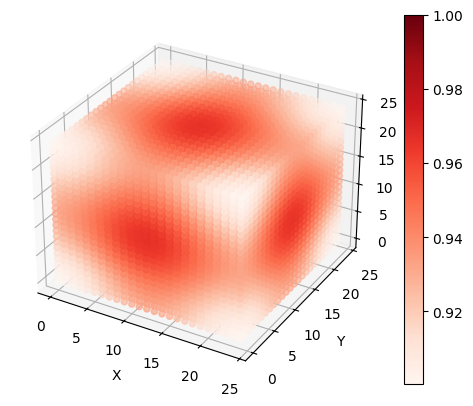

In [176]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from mpl_toolkits.mplot3d import Axes3D

class Molecule:
    def __init__(self, concentration=0, diffusion_rate=1):
        self.concentration = concentration
        self.diffusion_rate = diffusion_rate

    def __repr__(self):
        return f"Molecule(concentration={self.concentration}, diffusion_rate={self.diffusion_rate})"

class ReactionDiffusionSystem:
    def __init__(self, width, height, depth, molecule_a, diffusion_rate_a):
        self.width = width
        self.height = height
        self.depth = depth
        self.molecule_a = molecule_a
        self.diffusion_rate_a = diffusion_rate_a
        self.grid_a = np.zeros((depth, height, width))

    def initialize(self):
        # Initialize the center pixel with a concentration of 1
        center_x = self.width // 2
        center_y = self.height // 2
        center_z = self.depth // 2
        self.grid_a[center_x, center_y, center_z] = self.molecule_a.concentration
        # self.grid_a[center_x + 10, center_y + 10, center_z + 10] = self.molecule_a.concentration
        # self.grid_a[0, 0, 10] = self.molecule_a.concentration

    def update(self):
            # Define the 3D diffusion kernel
        diffusion_kernel = np.array([[[0, 0.125, 0],
                                    [0.125, 0.25, 0.125],
                                    [0, 0.125, 0]],

                                    [[0.125, 0.25, 0.125],
                                    [0.25, 1, 0.25],
                                    [0.125, 0.25, 0.125]],

                                    [[0, 0.125, 0],
                                    [0.125, 0.25, 0.125],
                                    [0, 0.125, 0]]])

        # Perform diffusion using convolution
        da = self.diffusion_rate_a * convolve(self.grid_a, diffusion_kernel, mode='wrap')

        # Update the concentration grid
        self.grid_a += da

        # Normalize values to a reasonable range
        max_val = np.max(self.grid_a)
        if max_val > 0:
            self.grid_a /= max_val

    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        z, y, x = self.grid_a.nonzero()
        c = self.grid_a[z, y, x]
        
        img = ax.scatter(x, y, z, c=c, cmap='Reds', marker='o')
        fig.colorbar(img)
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        plt.show()

    def is_converged(self, threshold=0.01):
        """Check if the concentration grid has converged."""
        change = np.max(np.abs(self.grid_a - np.mean(self.grid_a)))
        return change < threshold

molecule_a = Molecule(concentration=1)

system = ReactionDiffusionSystem(width=25, height=25, depth=25, molecule_a=molecule_a, diffusion_rate_a=1)
system.initialize()

iterations = 0
max_iterations = 500  # Set your maximum iteration limit here
while not system.is_converged() and iterations < max_iterations:
    system.update()
    iterations += 1

if iterations == max_iterations:
    print("Maximum iterations reached without convergence.")
else:
    print(f"Converged after {iterations} iterations.")
system.plot()

Maximum iterations reached without convergence.


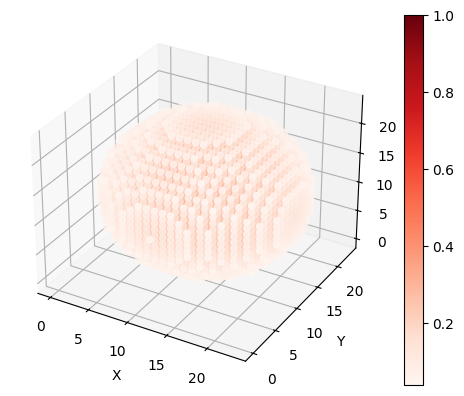

In [178]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from mpl_toolkits.mplot3d import Axes3D

class Molecule:
    def __init__(self, concentration=0, diffusion_rate=1):
        self.concentration = concentration
        self.diffusion_rate = diffusion_rate

    def __repr__(self):
        return f"Molecule(concentration={self.concentration}, diffusion_rate={self.diffusion_rate})"

class ReactionDiffusionSystem:
    def __init__(self, radius, molecule_a, diffusion_rate_a):
        self.radius = radius
        self.diameter = 2 * radius
        self.molecule_a = molecule_a
        self.diffusion_rate_a = diffusion_rate_a
        self.grid_a = np.zeros((self.diameter, self.diameter, self.diameter))
        self.sphere_mask = self.create_sphere_mask()

    def create_sphere_mask(self):
        """Create a spherical mask within a cubic grid."""
        z, y, x = np.indices((self.diameter, self.diameter, self.diameter))
        center = self.radius
        distance = np.sqrt((x - center)**2 + (y - center)**2 + (z - center)**2)
        return distance <= self.radius

    def initialize(self):
        # Initialize the center pixel with a concentration of 1
        center = self.radius
        self.grid_a[center, center, center] = self.molecule_a.concentration

    def update(self):
        # Define the 3D diffusion kernel for spherical coordinates
        diffusion_kernel = np.array([[[0, 0.125, 0],
                                      [0.125, 0.25, 0.125],
                                      [0, 0.125, 0]],

                                     [[0.125, 0.25, 0.125],
                                      [0.25, 1, 0.25],
                                      [0.125, 0.25, 0.125]],

                                     [[0, 0.125, 0],
                                      [0.125, 0.25, 0.125],
                                      [0, 0.125, 0]]])

        # Perform diffusion using convolution with boundary conditions
        da = self.diffusion_rate_a * convolve(self.grid_a, diffusion_kernel, mode='wrap')

        # Update the concentration grid only within the sphere
        self.grid_a[self.sphere_mask] += da[self.sphere_mask]

        # Normalize values to a reasonable range within the sphere
        max_val = np.max(self.grid_a[self.sphere_mask])
        if max_val > 0:
            self.grid_a[self.sphere_mask] /= max_val

    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        z, y, x = self.grid_a.nonzero()
        c = self.grid_a[z, y, x]
        
        img = ax.scatter(x, y, z, c=c, cmap='Reds', marker='o')
        fig.colorbar(img)
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        plt.show()

    def is_converged(self, threshold=0.01):
        """Check if the concentration grid has converged."""
        change = np.max(np.abs(self.grid_a[self.sphere_mask] - np.mean(self.grid_a[self.sphere_mask])))
        return change < threshold

molecule_a = Molecule(concentration=10)

system = ReactionDiffusionSystem(radius=12, molecule_a=molecule_a, diffusion_rate_a=0.5)
system.initialize()

iterations = 0
max_iterations = 10000  # Set your maximum iteration limit here
while not system.is_converged() and iterations < max_iterations:
    system.update()
    iterations += 1

if iterations == max_iterations:
    print("Maximum iterations reached without convergence.")
else:
    print(f"Converged after {iterations} iterations.")
system.plot()


Converged after 442 iterations.


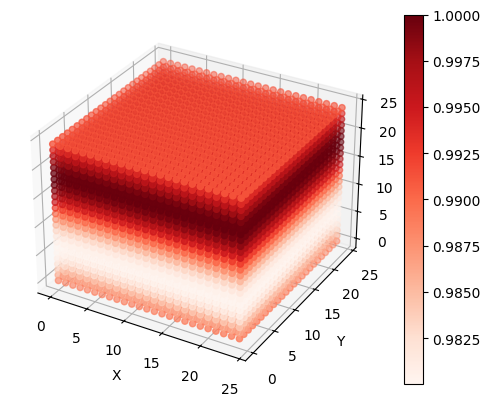

In [185]:
from typing import Optional
from typing_extensions import override

import numpy as np
from scipy.ndimage import convolve


class MoleculeType(): 
    """A molecule involved in the reaction-diffusion system.

    Args:
        concentration (float): The initial concentration of the molecule.
        diffusion_rate (float): The diffusion rate of the molecule.

    Attributes:
        concentration (float): The concentration of the molecule.
        diffusion_rate (float): The diffusion rate of the molecule.
    """

    def __init__(self, name, conc, D, mat = None):
        self._name = name
        self.conc = conc
        self.D = D
        self._mat = mat

    def __repr__(self):
        str = (f"Molecule(concentration={self.conc}"
               "diffusion_rate={self.diffusion_rate})")
        return str

    @property
    def name(self) -> str:
        """Name of the cell. Also defines the name of related forces and
        collections of effectors.
        """
        return self.name
        
    @name.setter
    def name(self, name: str):
        self.name = name


class ReactionDiffusionSystem:
    """A reaction-diffusion system simulation.

    Args:
        width (int): The width of the 2D grid.
        height (int): The height of the 2D grid.
        molecule_a (Molecule): The first type of molecule in the system.
        diffusion_rate_a (float): The diffusion rate of molecule A.

    Attributes:
        width (int): The width of the boundary.
        height (int): The height of the boundary.
        molecule_a (Molecule): The first type of molecule in the system.
        diffusion_rate_a (float): The diffusion rate of molecule A.
        grid_a (numpy.ndarray): The concentration grid. 
    """

    def __init__(self, size: tuple, mol_a: MoleculeType):
        self.size = size
        self.mol_a = mol_a
        self.grid = np.zeros((size[0], size[1], size[2]))

    def initialize(self, initial_concentration: Optional[float] = None):
        # Initialize with a linear gradient of concentration if initial_concentration is not None
        if initial_concentration is not None:
            # Create linear gradient along the X-axis
            gradient = np.linspace(0, initial_concentration, self.size[0])
            # Set the concentration grid with the linear gradient along the X-axis
            for i in range(self.size[0]):
                self.grid[i, :, :] = gradient[i]
        else:
            # Initialize the center pixel with a concentration of 1
            center_x = self.size[0] // 2
            center_y = self.size[1] // 2
            center_z = self.size[2] // 2
            self.grid[center_x, center_y, center_z] = self.mol_a.conc

    def update(self):
        # Define the 3D diffusion kernel
        diffusion_kernel = np.array([[[0, 0.125, 0],
                                    [0.125, 0.25, 0.125],
                                    [0, 0.125, 0]],

                                    [[0.125, 0.25, 0.125],
                                        [0.25, 1, 0.25],
                                        [0.125, 0.25, 0.125]],

                                    [[0, 0.125, 0],
                                        [0.125, 0.25, 0.125],
                                        [0, 0.125, 0]]])

        # Perform diffusion using convolution
        da = self.mol_a.D * convolve(self.grid, diffusion_kernel, mode='wrap')

        # Update the concentration grid
        self.grid += da

        # Normalize values to a reasonable range
        max_val = np.max(self.grid)
        if max_val > 0:
            self.grid /= max_val

    def is_converged(self, threshold=0.01):
        """Check if the concentration grid has converged."""
        change = np.max(np.abs(self.grid - np.mean(self.grid)))
        return change < threshold
    

    def plot(self):
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        
        z, y, x = self.grid.nonzero()
        c = self.grid[z, y, x]
        
        img = ax.scatter(x, y, z, c=c, cmap='Reds')
        fig.colorbar(img)
        
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        
        plt.show()
    

def main():
    # Define molecule types
    mol_A = MoleculeType("molA", conc=5, D=1)

    # Create reaction-diffusion system
    system = ReactionDiffusionSystem(size=(25, 25, 25), mol_a=mol_A)
    system.initialize(initial_concentration=5)  # Initialize with a linear gradient

    # Set simulation parameters
    max_iterations = 500

    # Run simulation
    iterations = 0
    while not system.is_converged() and iterations < max_iterations:
        system.update()
        iterations += 1

    if iterations == max_iterations:
        print("Maximum iterations reached without convergence.")
    else:
        print(f"Converged after {iterations} iterations.")
    system.plot()

if __name__ == "__main__":
    main()

In [23]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.ndimage import convolve

class Molecule:
    def __init__(self, diffusion_rate, reaction_rate, grid_size, time_step, total_time, initial_condition='random', location=None):
        self.diffusion_rate = diffusion_rate
        self.reaction_rate = reaction_rate
        self.grid_size = grid_size
        self.time_step = time_step
        self.total_time = total_time
        
        if initial_condition == 'random':
            self.concentration = np.random.rand(*grid_size)
        elif initial_condition == 'linear_gradient':
            self.concentration = np.linspace(0, 1, grid_size[0]).reshape(-1, 1, 1)
            self.concentration = np.tile(self.concentration, (1, grid_size[1], grid_size[2]))
        elif initial_condition == 'localized' and location is not None:
            self.concentration = np.zeros(grid_size)
            self.concentration[location] = 100
        
        # Define the Laplacian kernel for 3D
        self.laplacian_kernel = np.array([[[0, 0, 0],
                                           [0, 1, 0],
                                           [0, 0, 0]],
                                          [[0, 1, 0],
                                           [1, -6, 1],
                                           [0, 1, 0]],
                                          [[0, 0, 0],
                                           [0, 1, 0],
                                           [0, 0, 0]]])

    def laplacian(self, u):
        return convolve(u, self.laplacian_kernel, mode='constant', cval=0.0)

    def reaction_diffusion_system(self, t, y):
        u = y.reshape(self.grid_size)
        dudt = self.diffusion_rate * self.laplacian(u) + self.reaction_rate * u * (1 - u)
        return dudt.flatten()

    def run_simulation(self):
        y0 = self.concentration.flatten()
        t_span = (0, self.total_time)
        t_eval = np.arange(0, self.total_time, self.time_step)
        
        solution = solve_ivp(self.reaction_diffusion_system, t_span, y0, method='RK45', t_eval=t_eval)
        
        return solution.y.reshape(self.grid_size + (len(t_eval),))

# Example usage:
grid_size = (100, 100, 100)
diffusion_rate = 0.1
reaction_rate = 0.01
time_step = 0.1
total_time = 50.0

# Random initial concentration
# molecule = Molecule(initial_concentration, diffusion_rate, reaction_rate, grid_size, time_step, total_time)
# Linear gradient initial concentration
molecule = Molecule(diffusion_rate, reaction_rate, grid_size, time_step, total_time, initial_condition='localized', location=(50, 50, 50))
result = molecule.run_simulation()
print(result.shape)  # (50, 50, 50, 100)


(100, 100, 100, 500)


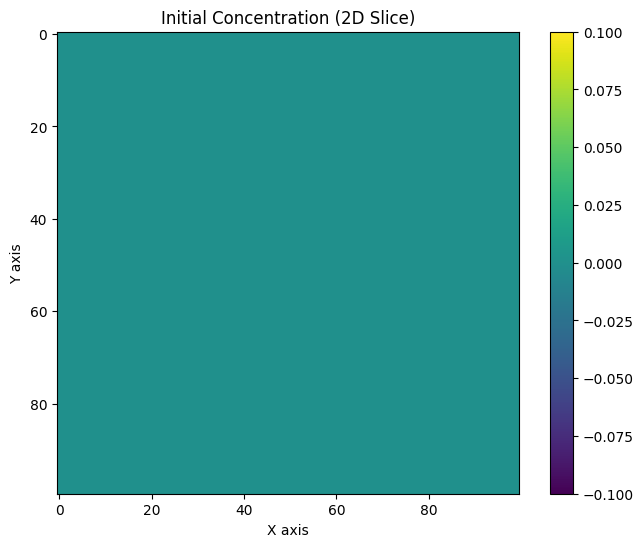

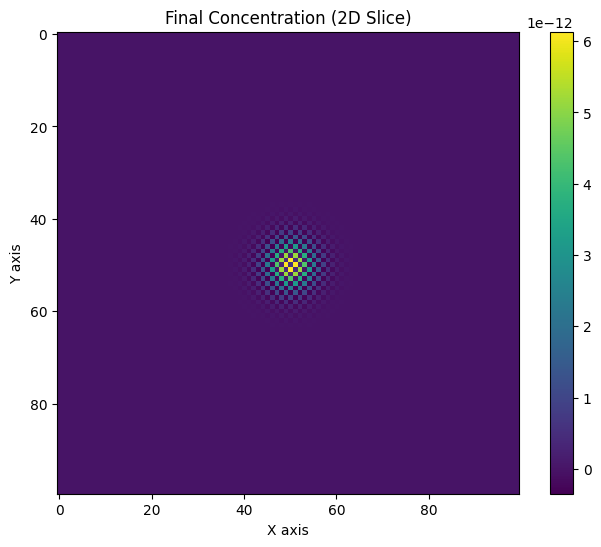

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_slice(data, slice_index, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(data[:, :, slice_index], cmap='viridis', interpolation='nearest')
    plt.colorbar()
    plt.title(title)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()

def visualize_3d(data, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    x, y, z = np.indices(data.shape)
    ax.scatter(x, y, z, c=data.flatten(), cmap='viridis', marker='o')
    ax.set_title(title)
    plt.show()


def visualize_concentrations(A_sol, B_sol, grid_size):
    # Visualize final concentrations for species A
    final_concentration_A = A_sol[..., -1]
    visualize_slice(final_concentration_A, grid_size[2] // 2, 'Final Concentration A (2D Slice)')
    
    # Visualize final concentrations for species B
    final_concentration_B = B_sol[..., -1]
    visualize_slice(final_concentration_B, grid_size[2] // 2, 'Final Concentration B (2D Slice)')

# Visualize initial concentration
visualize_slice(molecule.concentration, grid_size[2]//2, 'Initial Concentration (2D Slice)')

# Visualize computed concentration at final time step
final_concentration = result[..., -1]
visualize_slice(final_concentration, grid_size[2]//2, 'Final Concentration (2D Slice)')


In [89]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.ndimage import convolve

class Molecule:
    def __init__(self, diffusion_rate, initial_condition='random', location=None, grid_size=(50, 50, 50)):
        self.diffusion_rate = diffusion_rate
        self.grid_size = grid_size
        
        if initial_condition == 'random':
            self.concentration = np.random.rand(*grid_size)
        elif initial_condition == 'linear_gradient':
            self.concentration = np.linspace(0, 1, grid_size[0]).reshape(-1, 1, 1)
            self.concentration = np.tile(self.concentration, (1, grid_size[1], grid_size[2]))
        elif initial_condition == 'localized' and location is not None:
            self.concentration = np.zeros(grid_size)
            self.concentration[location] = 1.0


class DiffusionSystem:
    def __init__(self, molecules, grid_size, time_step, total_time):
        self.molecules = molecules
        self.grid_size = grid_size
        self.time_step = time_step
        self.total_time = total_time
        self.laplacian_kernel = np.array([
            [[1,  1,  1], [1,  1,  1], [1,  1,  1]],
            [[1,  1,  1], [1, -26, 1], [1,  1,  1]],
            [[1,  1,  1], [1,  1,  1], [1,  1,  1]]
        ]) / 26.0

    def laplacian(self, u):
        return convolve(u, self.laplacian_kernel, mode='wrap', cval=0.0)

    def diffusion_system(self, t, y):
        concentrations = []
        offset = 0
        for molecule in self.molecules:
            C = y[offset:offset + np.prod(self.grid_size)].reshape(self.grid_size)
            dC_dt = molecule.diffusion_rate * self.laplacian(C)
            concentrations.append(dC_dt.flatten())
            offset += np.prod(self.grid_size)
        return np.concatenate(concentrations)

    def run_simulation(self):
        # Initialize the combined state for all molecules
        y0 = np.concatenate([molecule.concentration.flatten() for molecule in self.molecules])
        t_span = (0, self.total_time)
        t_eval = np.arange(0, self.total_time, self.time_step)
        
        # Solve the diffusion system
        solution = solve_ivp(self.diffusion_system, t_span, y0, method='RK45', t_eval=t_eval)

        # Reshape the solution for each molecule
        results = []
        offset = 0
        for molecule in self.molecules:
            concentration_sol = solution.y[offset:offset + np.prod(self.grid_size)].reshape(self.grid_size + (len(t_eval),))
            results.append(concentration_sol)
            offset += np.prod(self.grid_size)
        return results
    

class ReactionDiffusionSystem:
    def __init__(self, molecules, reaction_rate, degradation_rate, grid_size, time_step, total_time):
        self.molecules = molecules
        self.reaction_rate = reaction_rate
        self.degradation_rate = degradation_rate
        self.grid_size = grid_size
        self.time_step = time_step
        self.total_time = total_time

        # Define the Laplacian kernel for 3D
        self.laplacian_kernel = np.array([[[0.1, 0.1, 0.1],
                                           [0.1, 1, 0.1],
                                           [0.1, 0.1, 0.1]],
                                          [[0.1, 1, 0.1],
                                           [1, -6, 1],
                                           [0.1, 1, 0.1]],
                                          [[0.1, 0.1, 0.1],
                                           [0.1, 1, 0.1],
                                           [0.1, 0.1, 0.1]]])

    def laplacian(self, u):
        return convolve(u, self.laplacian_kernel, mode='wrap', cval=0.0)

    def reaction_diffusion_system(self, t, y):
        A = y[:np.prod(self.grid_size)].reshape(self.grid_size)
        B = y[np.prod(self.grid_size):].reshape(self.grid_size)
        
        laplacian_A = self.laplacian(A)
        laplacian_B = self.laplacian(B)
        
        dA_dt = self.molecules[0].diffusion_rate * laplacian_A - self.reaction_rate * A
        dB_dt = self.molecules[1].diffusion_rate * laplacian_B + self.reaction_rate * A - self.degradation_rate * B
        
        return np.concatenate([dA_dt.flatten(), dB_dt.flatten()])

    def run_simulation(self):
        A_init = self.molecules[0].concentration.flatten()
        B_init = self.molecules[1].concentration.flatten()
        y0 = np.concatenate([A_init, B_init])
        
        t_span = (0, self.total_time)
        t_eval = np.arange(0, self.total_time, self.time_step)
        
        solution = solve_ivp(self.reaction_diffusion_system, t_span, y0, method='RK45', t_eval=t_eval)
        
        A_sol = solution.y[:np.prod(self.grid_size)].reshape(self.grid_size + (len(t_eval),))
        B_sol = solution.y[np.prod(self.grid_size):].reshape(self.grid_size + (len(t_eval),))
        return A_sol, B_sol

# utils.py

def visualize_slice(data, slice_index, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(data[:, :, slice_index], cmap='viridis', interpolation='nearest', vmin=0, vmax=1)
    plt.colorbar()
    plt.title(title)
    plt.xlabel('X axis')
    plt.ylabel('Y axis')
    plt.show()

def visualize_3d(data, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    x, y, z = np.indices(data.shape)
    ax.scatter(x, y, z, c=data.flatten(), cmap='viridis', marker='o')
    ax.set_title(title)
    plt.show()

Simulation completed in 0.62 seconds.


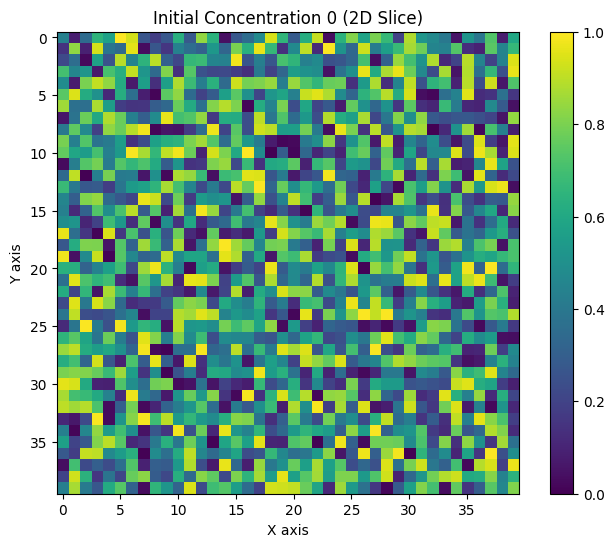

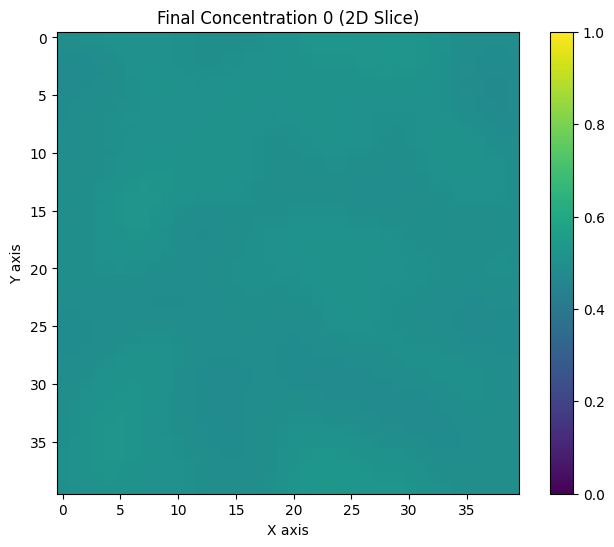

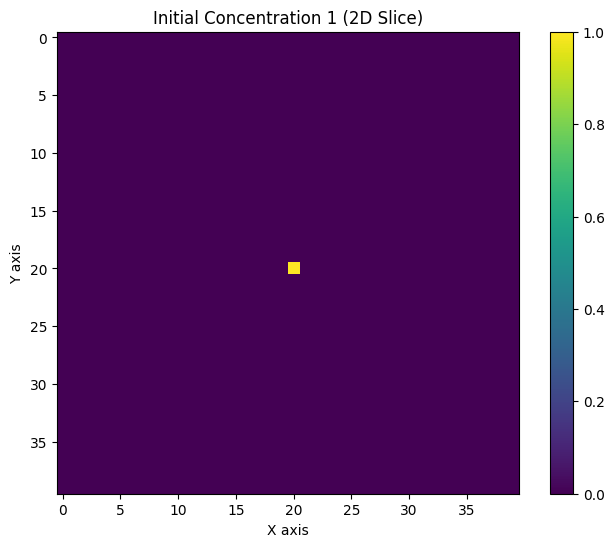

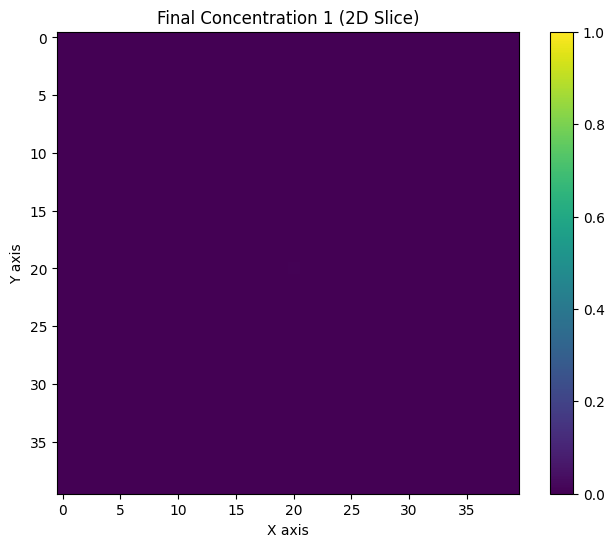

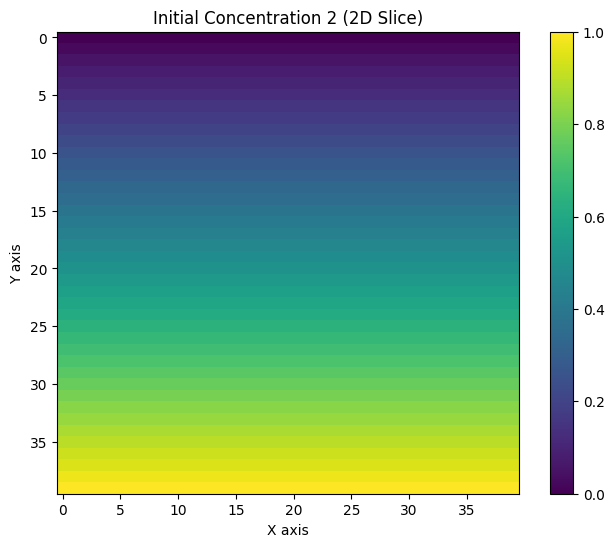

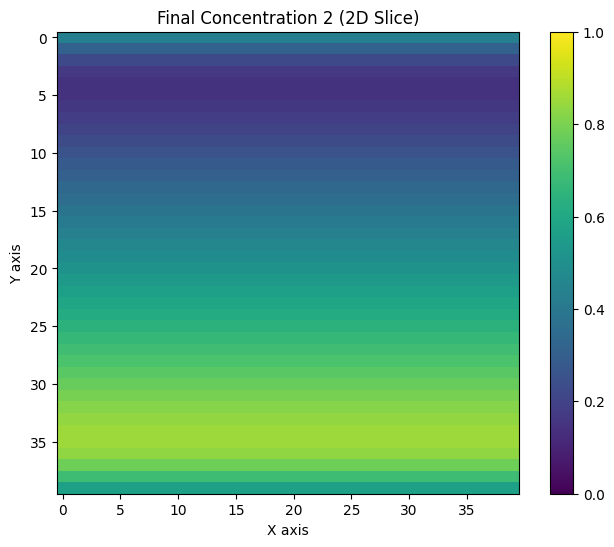

In [90]:

import time
# Example usage:
grid_size = (40, 40, 40)
diffusion_rate_A = 1.0
diffusion_rate_B = diffusion_rate_A
diffusion_rate_C = diffusion_rate_A
time_step = 0.1
total_time = 10

# Create molecules with different initial conditions
molecule_A = Molecule(diffusion_rate_A, initial_condition='random', grid_size=grid_size)
molecule_B = Molecule(diffusion_rate_B, initial_condition='localized', location=(20, 20, 20), grid_size=grid_size)
molecule_C = Molecule(diffusion_rate_C, initial_condition='linear_gradient', grid_size=grid_size)

# Create a diffusion system
diffusion_system = DiffusionSystem(
    [molecule_A, molecule_B, molecule_C],
    grid_size,
    time_step,
    total_time
)
    
    
start_time = time.time()
# Run the simulation
results = diffusion_system.run_simulation()
end_time = time.time()
print(f"Simulation completed in {end_time - start_time:.2f} seconds.")

for idx, result in enumerate(results): 
    visualize_slice(result[..., 0], grid_size[2] // 2, f'Initial Concentration {idx} (2D Slice)')
    visualize_slice(result[..., -1], grid_size[2] // 2, f'Final Concentration {idx} (2D Slice)')

In [ ]:
## crap 


'''class Voxel(BlenderObject):

    def __init__(self, obj: bpy.types.Object, loc: tuple, conc: tuple, mat=None):
        super(Voxel, self).__init__(obj)
        self.location = loc
        self.conc = conc
        self._mat = mat
        if self._mat:
            self.obj.data.materials.append(mat)   

    def recolor(self, color: tuple[float, float, float]):
        """Recolors the material of the cell.

        This function changes the diffuse color of the cell's material to the
        specified color while preserving the alpha value. If the material uses
        nodes, it also updates the 'Base Color' input of any nodes that have it.

        Args:
            color: A tuple (r, g, b) representing the new color to apply.
        """
        r, g, b = color
        self._mat.diffuse_color = (r, g, b, 1)

        if self._mat.use_nodes:
            for node in self._mat.node_tree.nodes:
                if "Base Color" in node.inputs:
                    _, _, _, a = node.inputs["Base Color"].default_value
                    node.inputs["Base Color"].default_value = r, g, b, a'''


class ReactionDiffusionSystem:
    """A reaction-diffusion system simulation.

    Args:
        width (int): The width of the 2D grid.
        height (int): The height of the 2D grid.
        molecule_a (Molecule): The first type of molecule in the system.
        diffusion_rate_a (float): The diffusion rate of molecule A.

    Attributes:
        width (int): The width of the boundary.
        height (int): The height of the boundary.
        molecule_a (Molecule): The first type of molecule in the system.
        diffusion_rate_a (float): The diffusion rate of molecule A.
        grid_a (numpy.ndarray): The concentration grid. 
    """
    color = (0.07, 0.21, 0.3)

    def __init__(self, loc: tuple, size: tuple, voxel_size: int, mol_a: Molecule):
        self.size = size
        self.loc = loc
        self.voxel_size = voxel_size
        self.mol_a = mol_a
        self.grid = np.zeros((size[0], size[1], size[2]))
        self._voxel_data = []
        self._voxels = set()

    @property
    def voxels(self) -> list[Voxel]:
        """The list of cells associated with this cell type."""
        return list(self._voxels)
    
    def initialize(self, initial_concentration: Optional[float] = None):
        num_x, num_y, num_z = self.size

        min_x = self.loc[0] - self.size[0] / 2
        min_y = self.loc[1] - self.size[1] / 2
        min_z = self.loc[2] - self.size[2] / 2

        # Create voxels
        for i in range(num_x):
            for j in range(num_y):
                for k in range(num_z):
                    # Calculate the position of each voxel
                    x = min_x + i * self.voxel_size + self.voxel_size / 2
                    y = min_y + j * self.voxel_size + self.voxel_size / 2
                    z = min_z + k * self.voxel_size + self.voxel_size / 2
                    voxel_location = (x, y, z)

                    # linear gradient along x-axis
                    if initial_concentration is not None:
                        concentration = initial_concentration * (i / (num_x - 1))
                    else:
                        # Otherwise, use default concentration
                        concentration = self.default_concentration

                    # Store the voxel information with the calculated concentration
                    self._voxel_data.append((voxel_location, concentration))

    def update(self):
        # Define the 3D diffusion kernel
        diffusion_kernel = np.array([[[0, 0.125, 0],
                                    [0.125, 0.25, 0.125],
                                    [0, 0.125, 0]],

                                    [[0.125, 0.25, 0.125],
                                     [0.25, 1, 0.25],
                                     [0.125, 0.25, 0.125]],

                                    [[0, 0.125, 0],
                                     [0.125, 0.25, 0.125],
                                     [0, 0.125, 0]]])

        # Perform diffusion using convolution
        da = self.mol_a.D * convolve(self.grid, diffusion_kernel, mode='wrap')

        # Update the concentration grid
        self.grid += da

        # Normalize values to a reasonable range
        max_val = np.max(self.grid)
        if max_val > 0:
            self.grid /= max_val

    def is_converged(self, threshold=0.1):
        """Check if the concentration grid has converged."""
        change = np.max(np.abs(self.grid - np.mean(self.grid)))
        return change < threshold
    
    def toggle_voxel_grid(self):
        """Create a 3D grid in Blender.

        Args:
            loc: Center of the grid.
            size: Dimensions of the grid (width, height, depth).
            voxel_size: Size of a voxel in the grid.
        """

        for idx, loc in enumerate(self._voxel_data):      
            # Create an empty cube at the voxel position
            name = f"voxel_{idx}"
            obj = create_mesh(name, 
                              loc[0], 
                              mesh="cube", 
                              size=self.voxel_size, 
                              subdivisions=1)
            bpy.context.scene.collection.objects.link(obj)  

            # Add concentrations vector
            concentration_vector = np.random.rand(5)
            for idx, conc in enumerate(concentration_vector):
                obj[f"conc_{idx}"] = float(conc)

            color = self.__class__.color

            mat = create_material(f"{name}_material", color=color) if color else None
            # Store the voxel information
            voxel = Voxel(obj=obj, loc=loc, conc=concentration_vector, mat=mat)
            self._voxels.add(voxel)

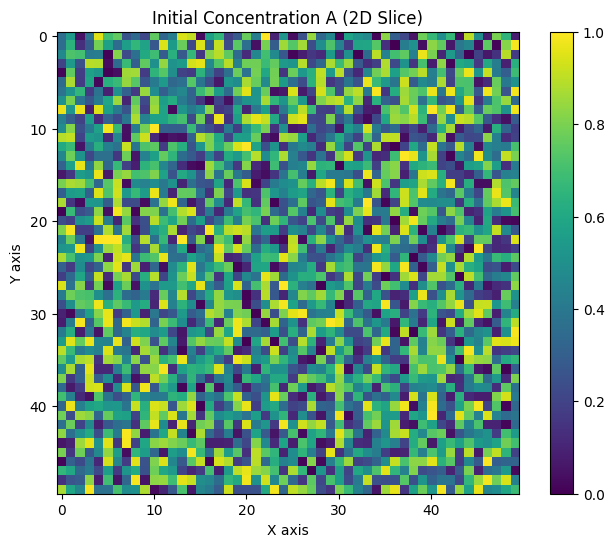

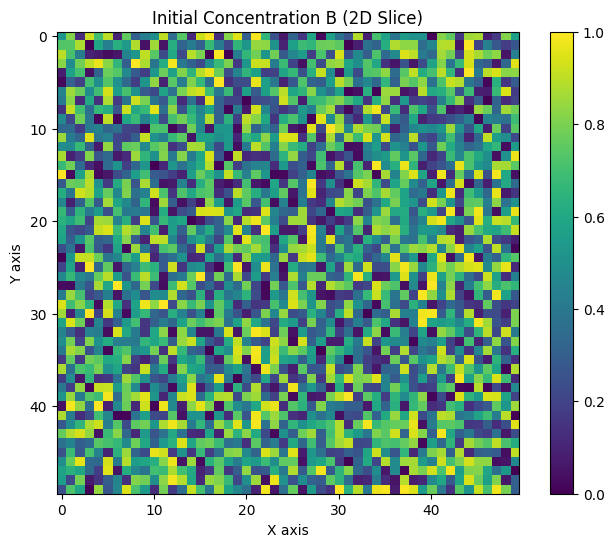

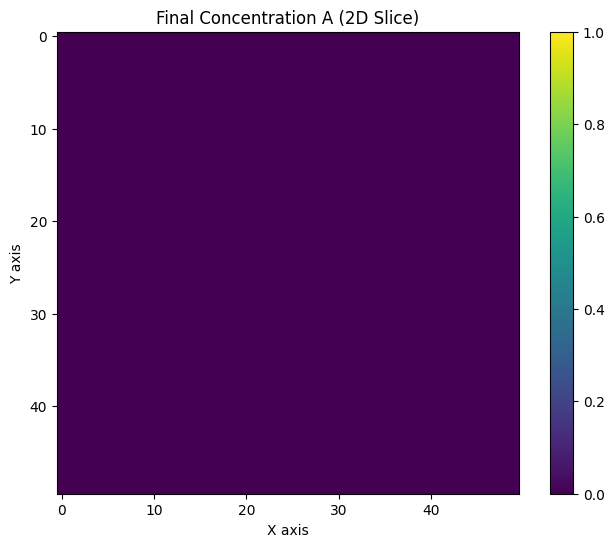

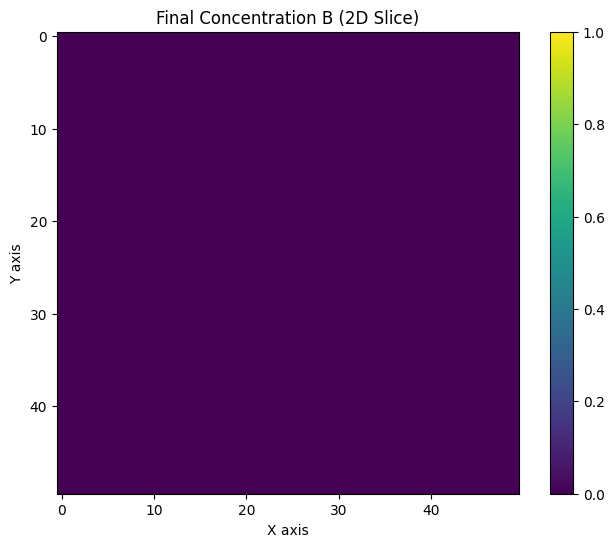

In [87]:
# Example usage:
grid_size = (50, 50, 50)
diffusion_rate_A = 0.1
diffusion_rate_B = 0.2
reaction_rate = 1
degradation_rate = 0.5
time_step = 0.1
total_time = 100.0

# Create molecules with different initial conditions
molecule_A = Molecule(diffusion_rate_A, initial_condition='random', grid_size=grid_size)
molecule_B = Molecule(diffusion_rate_B, initial_condition='random', grid_size=grid_size)

# Create a reaction-diffusion system
reaction_diffusion_system = ReactionDiffusionSystem(
    [molecule_A, molecule_B],
    reaction_rate,
    degradation_rate,
    grid_size,
    time_step,
    total_time
)

# Run the simulation
A_sol, B_sol = reaction_diffusion_system.run_simulation()

# Visualize initial concentration
visualize_slice(molecule_A.concentration, grid_size[2]//2, 'Initial Concentration A (2D Slice)')
visualize_slice(molecule_B.concentration, grid_size[2]//2, 'Initial Concentration B (2D Slice)')

# Visualize the concentrations
visualize_concentrations(A_sol, B_sol, grid_size)

# Molecule secreting ligands in 3D grid

MovieWriter Pillow unavailable; using Pillow instead.


IndexError: list index out of range

Error in callback <function _draw_all_if_interactive at 0x116ac3920> (for post_execute), with arguments args (),kwargs {}:


TypeError: 'NoneType' object is not subscriptable

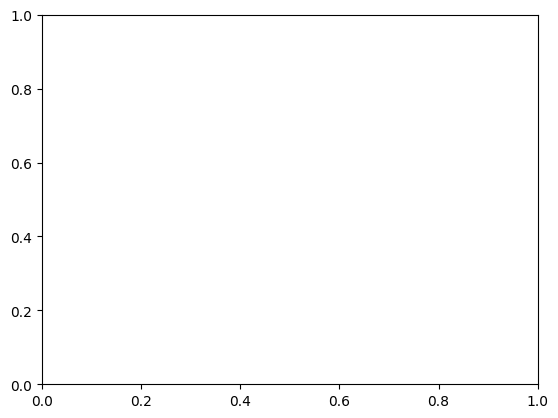

In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Load JSON data
with open('/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/adhesion/20240626_adhesion_surfaces/20240626_adhesion_POINTS/test.json', 'r') as f:
    data = json.load(f)

# Extract frames
frames = data['frames']

# Assume we are plotting the middle slice along the z-axis
def get_middle_slice(concentrations):
    if concentrations is None:
        return None
    z_mid = len(concentrations) // 2
    return np.array(concentrations[z_mid])

# Prepare the figure
fig, ax = plt.subplots()
im = None

def update_plot(frame_data):
    global im
    concentrations = frame_data['concentrations']
    slice_data = get_middle_slice(concentrations)
    
    if slice_data is None:
        slice_data = np.zeros((len(concentrations[0]), len(concentrations[0][0])))
        
    if im is None:
        im = ax.imshow(slice_data, cmap='viridis', vmin=0, vmax=np.max(slice_data))
    else:
        im.set_data(slice_data)
    ax.set_title(f"Frame {frame_data['frame']}")

# Create an animation
ani = animation.FuncAnimation(fig, update_plot, frames=frames, repeat=False)

# Save the animation as a gif
ani.save('/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/adhesion/20240626_adhesion_surfaces/20240626_adhesion_POINTS/concentration_animation.gif', writer='Pillow')

# Show the plot
plt.show()


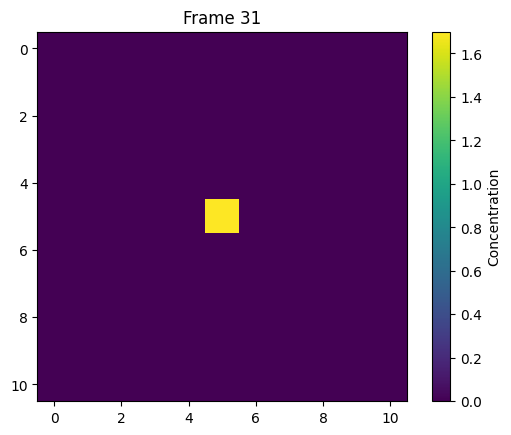

In [6]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Load JSON data
with open('/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/adhesion/20240626_adhesion_surfaces/20240626_adhesion_POINTS/test.json', 'r') as f:
    data = json.load(f)

# Extract frames
frames = data['frames']

# Function to get the middle slice along the z-axis
def get_middle_slice(concentrations):
    if concentrations is None:
        return None
    z_mid = len(concentrations) // 2
    return np.array(concentrations[z_mid])

# Select a single frame to plot
frame_index = 30  # Change this to the index of the frame you want to plot
frame_data = frames[frame_index]

# Get the middle slice
concentrations = frame_data['concentrations']
slice_data = get_middle_slice(concentrations)

if slice_data is None:
    slice_data = np.zeros((len(concentrations[3]), len(concentrations[0][0])))

# Plot the middle slice
plt.figure()
plt.imshow(slice_data, cmap='viridis', vmin=0, vmax=np.max(slice_data))
plt.title(f"Frame {frame_data['frame']}")
plt.colorbar(label='Concentration')
plt.show()


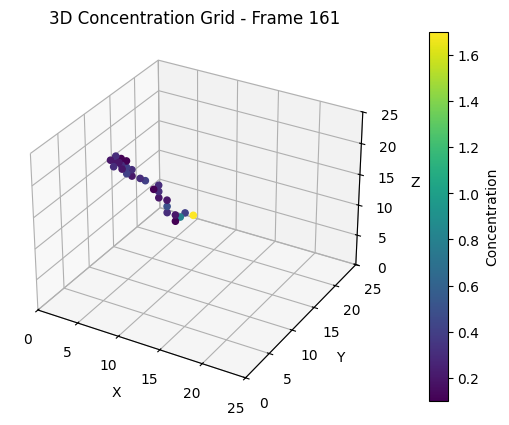

In [52]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load JSON data
with open('/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/adhesion/20240626_adhesion_surfaces/20240626_adhesion_POINTS/test.json', 'r') as f:
    data = json.load(f)

# Extract frames
frames = data['frames']

# Select a single frame to plot
frame_index = 160  # Change this to the index of the frame you want to plot
frame_data = frames[frame_index]

# Get the concentration data
concentrations = frame_data['concentrations']

if concentrations is None:
    raise ValueError("No concentration data available for the selected frame.")

# Convert to numpy array for easier manipulation
concentrations = np.array(concentrations)

# Generate the coordinates for the grid
x, y, z = np.indices(concentrations.shape)

# Flatten the arrays
x = x.flatten()
y = y.flatten()
z = z.flatten()
concentrations = concentrations.flatten()

# Filter out zero concentration points for better visualization
non_zero_mask = concentrations > 0
x = x[non_zero_mask]
y = y[non_zero_mask]
z = z[non_zero_mask]
concentrations = concentrations[non_zero_mask]

# Normalize concentrations for transparency
concentrations_normalized = concentrations / np.max(concentrations)

# Create a 3D scatter plot with transparency
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(x, y, z, c=concentrations, cmap='viridis', marker='o', alpha=1)

# Add color bar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Concentration')

# Set plot labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f"3D Concentration Grid - Frame {frame_data['frame']}")

ax.set_xlim(0, 25)
ax.set_ylim(0, 25)
ax.set_zlim(0, 25)

# Show the plot
plt.show()


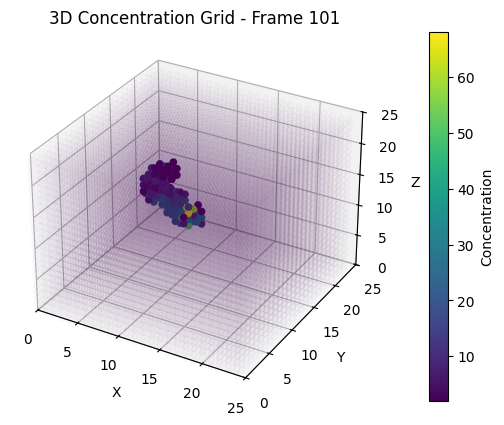

In [66]:
import json
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load JSON data
with open('/Users/antoine/Harvard/MegasonLab/GPU_backup/AntoineRuzette/goo/data/adhesion/20240626_adhesion_surfaces/20240626_adhesion_POINTS/test.json', 'r') as f:
    data = json.load(f)

# Extract frames
frames = data['frames']

# Select a single frame to plot
frame_index = 100  # Change this to the index of the frame you want to plot
frame_data = frames[frame_index]

# Get the concentration data
concentrations = frame_data['concentrations']

if concentrations is None:
    raise ValueError("No concentration data available for the selected frame.")

# Convert to numpy array for easier manipulation
concentrations = np.array(concentrations)

# Generate the coordinates for the grid
x, y, z = np.indices(concentrations.shape)

# Flatten the arrays
x = x.flatten()
y = y.flatten()
z = z.flatten()
concentrations = concentrations.flatten()

# Separate data into two sets based on concentration
low_concentration_mask = concentrations == 0
high_concentration_mask = ~low_concentration_mask

x_low = x[low_concentration_mask]
y_low = y[low_concentration_mask]
z_low = z[low_concentration_mask]
concentrations_low = concentrations[low_concentration_mask]

x_high = x[high_concentration_mask]
y_high = y[high_concentration_mask]
z_high = z[high_concentration_mask]
concentrations_high = concentrations[high_concentration_mask]

# Create a 3D scatter plot with different transparency levels
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot low concentration points with low transparency
sc_low = ax.scatter(x_low, y_low, z_low, c=concentrations_low, cmap='viridis', marker='o', alpha=0.02)

# Plot high concentration points with no transparency
sc_high = ax.scatter(x_high, y_high, z_high, c=concentrations_high, cmap='viridis', marker='o', alpha=1.0)

# Add color bar (use high concentration scatter for the color bar)
cbar = plt.colorbar(sc_high, ax=ax, pad=0.1)
cbar.set_label('Concentration')

# Set plot labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title(f"3D Concentration Grid - Frame {frame_data['frame']}")

ax.set_xlim(0, 25)
ax.set_ylim(0, 25)
ax.set_zlim(0, 25)

# Show the plot
plt.show()

In [ ]:
# Function to plot the 3D concentration grid for a given frame
def plot_concentration_grid(cell, frame_data):
    # Get the concentration data
    concentrations = frame_data['concentrations']
    
    if concentrations is None:
        raise ValueError("No concentration data available for the selected frame.")

    # Convert to numpy array for easier manipulation
    concentrations = np.array(concentrations)

    # Generate the coordinates for the grid
    x, y, z = np.indices(concentrations.shape)

    # Flatten the arrays
    x = x.flatten()
    y = y.flatten()
    z = z.flatten()
    concentrations = concentrations.flatten()

    # Filter out zero concentration points for better visualization
    non_zero_mask = concentrations > 0
    x = x[non_zero_mask]
    y = y[non_zero_mask]
    z = z[non_zero_mask]
    concentrations = concentrations[non_zero_mask]

    # Separate data into two sets based on concentration
    low_concentration_mask = concentrations < 0.1
    high_concentration_mask = ~low_concentration_mask

    x_low = x[low_concentration_mask]
    y_low = y[low_concentration_mask]
    z_low = z[low_concentration_mask]
    concentrations_low = concentrations[low_concentration_mask]

    x_high = x[high_concentration_mask]
    y_high = y[high_concentration_mask]
    z_high = z[high_concentration_mask]
    concentrations_high = concentrations[high_concentration_mask]

    # Create a 3D scatter plot with different transparency levels
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Plot low concentration points with low transparency
    sc_low = ax.scatter(x_low, y_low, z_low, c=concentrations_low, cmap='viridis', marker='o', alpha=0.3)

    # Plot high concentration points with no transparency
    sc_high = ax.scatter(x_high, y_high, z_high, c=concentrations_high, cmap='viridis', marker='o', alpha=1.0)

    # Add color bar (use high concentration scatter for the color bar)
    cbar = plt.colorbar(sc_high, ax=ax, pad=0.1)
    cbar.set_label('Concentration')

    # Set plot labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f"3D Concentration Grid - Frame {frame_data['frame']}")

    ax.set_xlim(0, 25)
    ax.set_ylim(0, 25)
    ax.set_zlim(0, 25)

    # Show the plot
    plt.show()